# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. Furthermore, we will provide best practices and introduce visualization tools for effectively conducting big data analysis and visualization.

---

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Conclusion
7. References

---

## Introduction
In this notebook I will explore a text-based, document-based [dataset](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) using scientific computing tools such as Pandas and Numpy. In addition, several fundamental Data Mining concepts will be explored and explained in details, ranging from calculating distance measures to computing term frequency vectors. Coding examples, visualizations and demonstrations will be provided where necessary. Furthermore, additional exercises are provided after special topics. These exercises are geared towards testing the proficiency of students and motivate students to explore beyond the techniques covered in the notebook. 

---

### Requirements
Here are the computing and software requirements

#### Computing Resources
- Operating system: Preferably Linux or MacOS
- RAM: 8 GB
- Disk space: Mininium 8 GB

#### Software Requirements
Here is a list of the required programs and libraries necessary for this lab session:

##### Language:
- [Python 3+](https://www.python.org/download/releases/3.0/) (Note: coding will be done strictly on Python 3)
    - Install latest version of Python 3
    
##### Environment:
Using an environment is to avoid some library conflict problems. You can refer this [Setup Instructions](http://cs231n.github.io/setup-instructions/) to install and setup.

- [Anaconda](https://www.anaconda.com/download/) (recommended but not required)
    - Install anaconda environment
    
- [Python virtualenv](https://virtualenv.pypa.io/en/stable/userguide/) (recommended to Linux/MacOS user)
    - Install virtual environment

- [Kaggle Kernel](https://www.kaggle.com/kernels/)
    - Run on the cloud  (with some limitations)
    - Reference: [Kaggle Kernels Instructions](https://github.com/omarsar/data_mining_lab/blob/master/kagglekernel.md)
    
##### Necessary Libraries:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install `jupyter` and Use `$jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install `sklearn` latest python library
- [Pandas](http://pandas.pydata.org/)
    - Install `pandas` python library
- [Numpy](http://www.numpy.org/)
    - Install `numpy` python library
- [Matplotlib](https://matplotlib.org/)
    - Install `maplotlib` for python
- [Plotly](https://plot.ly/)
    - Install and signup for `plotly`
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install `nltk` library

---

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

---

## 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors, is provided below:

- *The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*

If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas. 

![atl txt](https://docs.google.com/drawings/d/e/2PACX-1vRd845nNXa1x1Enw6IoEbg-05lB19xG3mfO2BjnpZrloT0pSnY89stBV1gS9Iu6cgRCTq3E5giIT5ZI/pub?w=835&h=550)

---

## 2. Data Preparation
Now let us begin to explore the data. The original dataset can be found on the link provided above or you can directly use the version provided by scikit learn. Here we will use the scikit learn version. 

In this demonstration we are only going to look at 4 categories. This means we will not make use of the complete dataset, but only a subset of it, which includes the 4 categories defined below:

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

Let's take at look some of the records that are contained in our subset of the data

In [4]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [5]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [6]:
len(twenty_train.data)

2257

In [7]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [186]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



... and determine the label of the example via `target_names` key value

In [187]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [188]:
twenty_train.target[0]

1

... we can also get the category of 10 documents via `target` key value 

In [189]:
# category of first 10 documents.
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

**Note:** As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

Here is one way to get access to the *text* version of the label of a subset of our training data:

In [190]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [191]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [192]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [271]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [272]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [273]:
len(X)

2257

In [274]:
X[0:2]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


In [275]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [276]:
# add category to the dataframe
X['category'] = twenty_train.target

In [277]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Now we can print and see what our table looks like. 

In [278]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like **removing records with missing values** and **aggregating new fields** to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

---

### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

In [279]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [280]:
X[-10:]

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


Ready for some sourcery? Brace yourselves! Let us see if we can query every 10th record in our dataframe. In addition, our query must only contain the first 10 records. For this we will use the build-in function called `iloc`. This allows us to query a selection of our dataset by position. 

In [281]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0


You can also use the `loc` function to explicity define the columns you want to query. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [282]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

In [283]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [284]:
# Answer here
df1 = X.sort_index().loc[1:6]
df1

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian


---

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [285]:
# Answer here
# Answer here
#X[X['category_name']=='sci.med'].iloc[::10][0:5]
X.loc[lambda f: f.category_name == 'sci.med'].iloc[::10, :][0:5]


,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

First, let us consider that our dataset has some *missing values* and we want to remove those values. In its current state our dataset has no missing values, but for practice sake we will add some records with missing values and then write some code to deal with these objects that contain missing values. You will see for yourself how easy it is to deal with missing values once you have your data transformed into a Pandas dataframe.

Before we jump into coding, let us do a quick review of what we have learned in the Data Mining course. Specifically, let's review the methods used to deal with missing values.

The most common reasons for having missing values in datasets has to do with how the data was initially collected. A good example of this is when a patient comes into the ER room, the data is collected as quickly as possible and depending on the conditions of the patients, the personal data being collected is either incomplete or partially complete. In the former and latter cases, we are presented with a case of "missing values". Knowing that patients data is particularly critical and can be used by the health authorities to conduct some interesting analysis, we as the data miners are left with the tough task of deciding what to do with these missing and incomplete records. We need to deal with these records because they are definitely going to affect our analysis or learning algorithms. So what do we do? There are several ways to handle missing values, and some of the more effective ways are presented below (Note: You can reference the slides - Session 1 Handout for the additional information).

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you lose some information, and in some cases too much of it. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you ignore missing values, especially when in this day and age it is difficult to obtain high quality datasets? Again, there are some tradeoffs, which we will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based appraoch or probabilistic approach.  

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [286]:
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [287]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [288]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [289]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [290]:
dummy_series

text        dummy_record
category               1
dtype: object

In [291]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [292]:
# check if the records was commited into result
len(result_with_series)

2258

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [293]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [294]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [295]:
X = X.append(dummy_dict, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [296]:
len(X)

2258

In [297]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [298]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [299]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [300]:
len(X)

2257

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [301]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [302]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [303]:
# Answer here
#NA_df.isnull().sum(axis=1)
NA_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)
#isnull did not work in this scenario because it treat the word/text 'NaN' same as ' or missing value. 
#It also sees a values/words/text that are without inverted commas ('') as null.

0    (The amoung of missing records is: , 1)
1    (The amoung of missing records is: , 1)
2    (The amoung of missing records is: , 0)
3    (The amoung of missing records is: , 0)
4    (The amoung of missing records is: , 1)
5    (The amoung of missing records is: , 0)
dtype: object

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [304]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2227    False
2228    False
2229    False
2230    False
2231    False
2232    False
2233    False
2234    False
2235    False
2236    False
2237    False
2238    False
2239    False
2240    False
2241    False
2242    False
2243    False
2244    False
2245    False
2246    False
2247    False
2248    False
2249    False
2250    False
2251    False
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [305]:
sum(X.duplicated())

0

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by onyl checking the `text` attribute. 

In [306]:
sum(X.duplicated('text'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [307]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [308]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [309]:
len(X)

2259

In [310]:
sum(X.duplicated('text'))

1

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [311]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [312]:
len(X)

2257

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [313]:
X_sample = X.sample(n=1000) #random state

In [314]:
len(X_sample)

1000

In [315]:
X_sample[0:4]

,text,category,category_name
721,From: schlegel@cwis.unomaha.edu (Mark Schlegel...,0,alt.atheism
205,From: noye@midway.uchicago.edu (vera shanti no...,3,soc.religion.christian
183,From: karl@anasazi.com (Karl Dussik) Subject: ...,2,sci.med
231,From: drt@athena.mit.edu (David R Tucker) Subj...,3,soc.religion.christian


---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [316]:
# Answer here
X[0:5]
#sample
X_sample[0:5]

#yes, the X  in first line of code above, data are taken from the first five records
#X_sample is randomly selection of any five records.
#when X_sample=X.sample executed again it will do another random pick of any numbers within the limit therefore data will change.


,text,category,category_name
721,From: schlegel@cwis.unomaha.edu (Mark Schlegel...,0,alt.atheism
205,From: noye@midway.uchicago.edu (vera shanti no...,3,soc.religion.christian
183,From: karl@anasazi.com (Karl Dussik) Subject: ...,2,sci.med
231,From: drt@athena.mit.edu (David R Tucker) Subj...,3,soc.religion.christian
770,From: harvey@oasys.dt.navy.mil (Betty Harvey) ...,2,sci.med


---

In [317]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [318]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


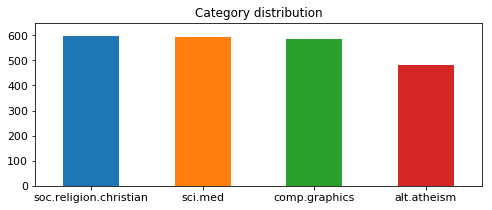

In [319]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   269
comp.graphics             261
soc.religion.christian    261
alt.atheism               209
Name: category_name, dtype: int64


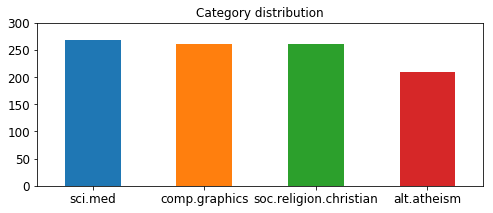

In [320]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [321]:
You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

SyntaxError: invalid syntax (<ipython-input-321-e0e6225f739d>, line 1)

---

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sci.med                   269
comp.graphics             261
soc.religion.christian    261
alt.atheism               209
Name: category_name, dtype: int64


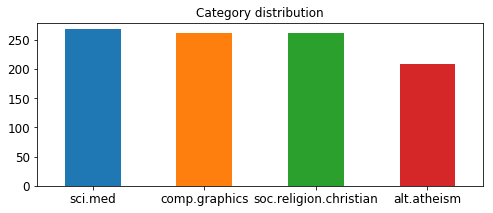

In [322]:
# Answer here
ub = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, ub], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

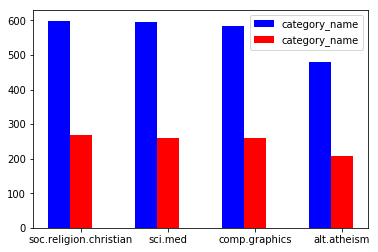

In [358]:
# Answer here
bar1 = X.category_name.value_counts()
bar2 = X_sample.category_name.value_counts()
index = np.arange(4)
W = ["soc.religion.christian", "sci.med", "comp.graphics", "alt.atheism"]
    
plt.bar(index,bar1.tolist(), color='b', label='category_name', width=0.25)
plt.bar(index+0.25,bar2.tolist(), color='r',label='category_name',  width=0.25)
plt.xticks(index+0.25,W)
plt.legend()
plt.show()

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [359]:
import nltk

In [360]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [361]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [362]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [363]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [364]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [365]:
X_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

What we did with those two lines of code is that we transorfmed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [366]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [367]:
# Answer here
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

Now let us look at the term-document matrix we built above.

In [368]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [369]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transofrm` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [370]:
X[0:5]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com..."


In [371]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [373]:
# Answer here
arrayX = X_counts[0:5,0:100].toarray()

i=0
column_count = 0

for row in arrayX:
    i = 0
    for col in row:
        i=i+1
        if col == 1 and i > 1: # i > 1 used this condition to ingnore the 1st term (00) that we already know.
            column_count = i

count_vect.get_feature_names()[column_count-1]

# the answer term_vector/vocab 01 as it is correspond to the 38th column which is in index (4,37) in the normal matrix array


'01'

---

We can also use the vectorizer to generate word frequency vector for new documents or articles. Let us try that below:

In [374]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Now let us put a `00` in the document to see if it is detected as we expect. 

In [375]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

Impressive, huh!

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [376]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [377]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [383]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [384]:
plot_z = X_counts[0:20, 0:20].toarray()

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

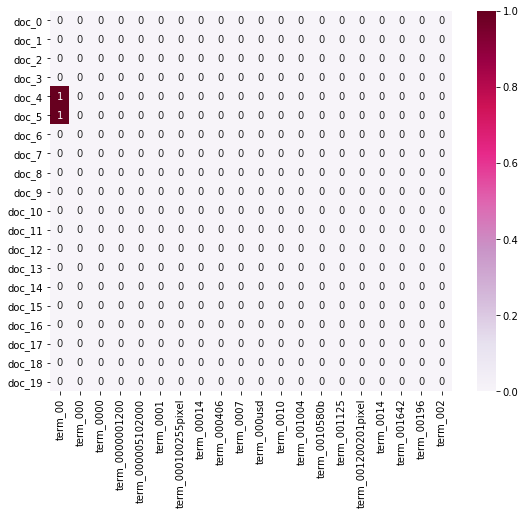

In [398]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [387]:
# Answer here


---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

---

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [388]:
from sklearn.decomposition import PCA

In [389]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [390]:
X_reduced.shape

(2257, 2)

In [391]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

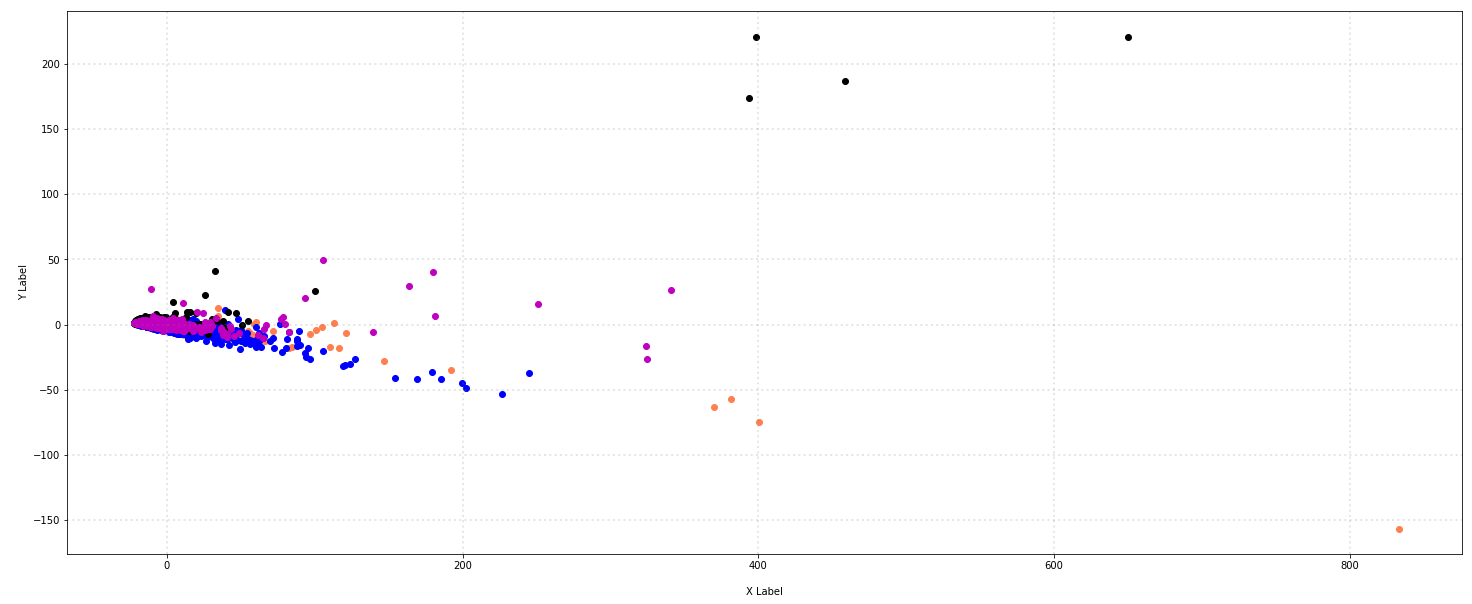

In [392]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [393]:
# Answer here


---

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [394]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [395]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [396]:
term_frequencies[0]

134

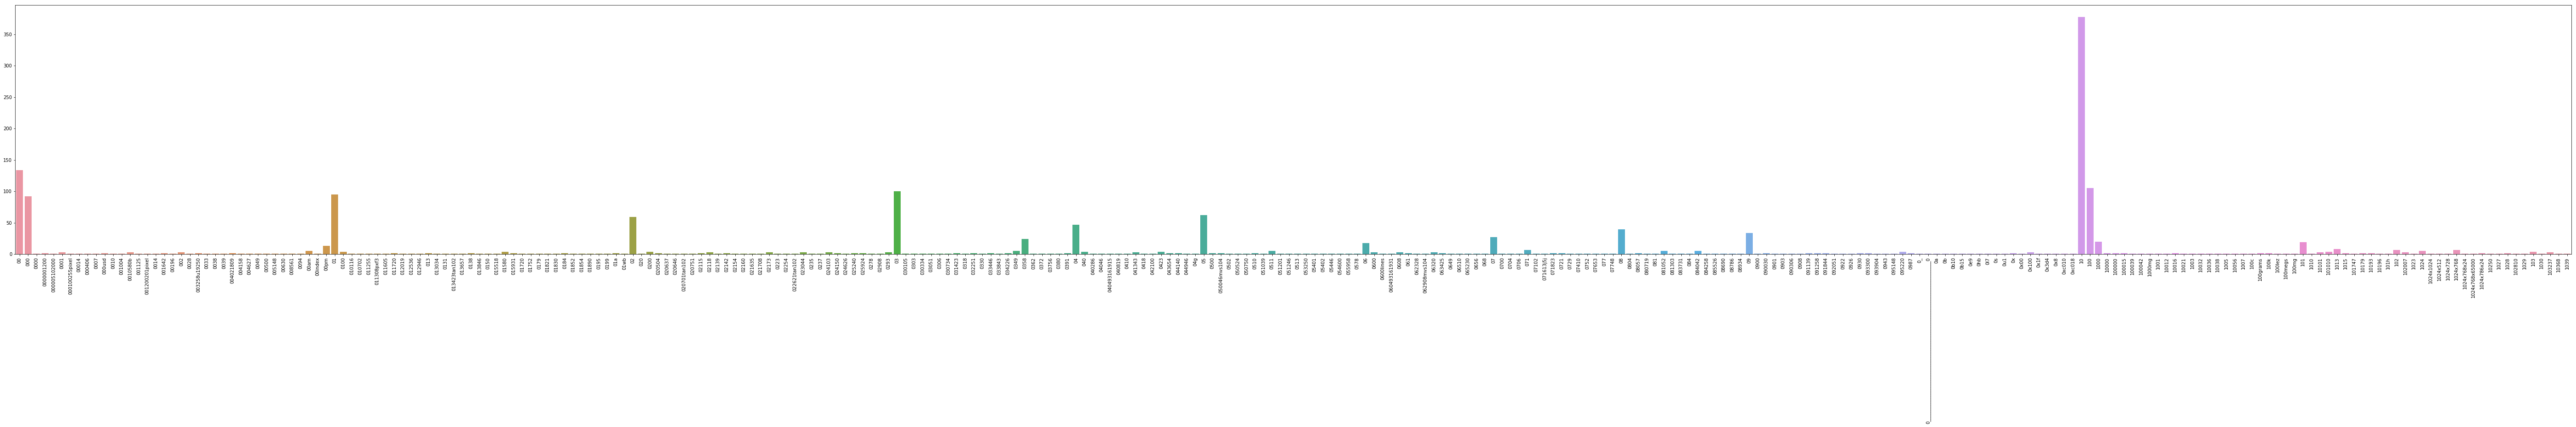

In [397]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [97]:
# Answer here


---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [98]:
# Answer here


---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [99]:
# Answer here


---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [193]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

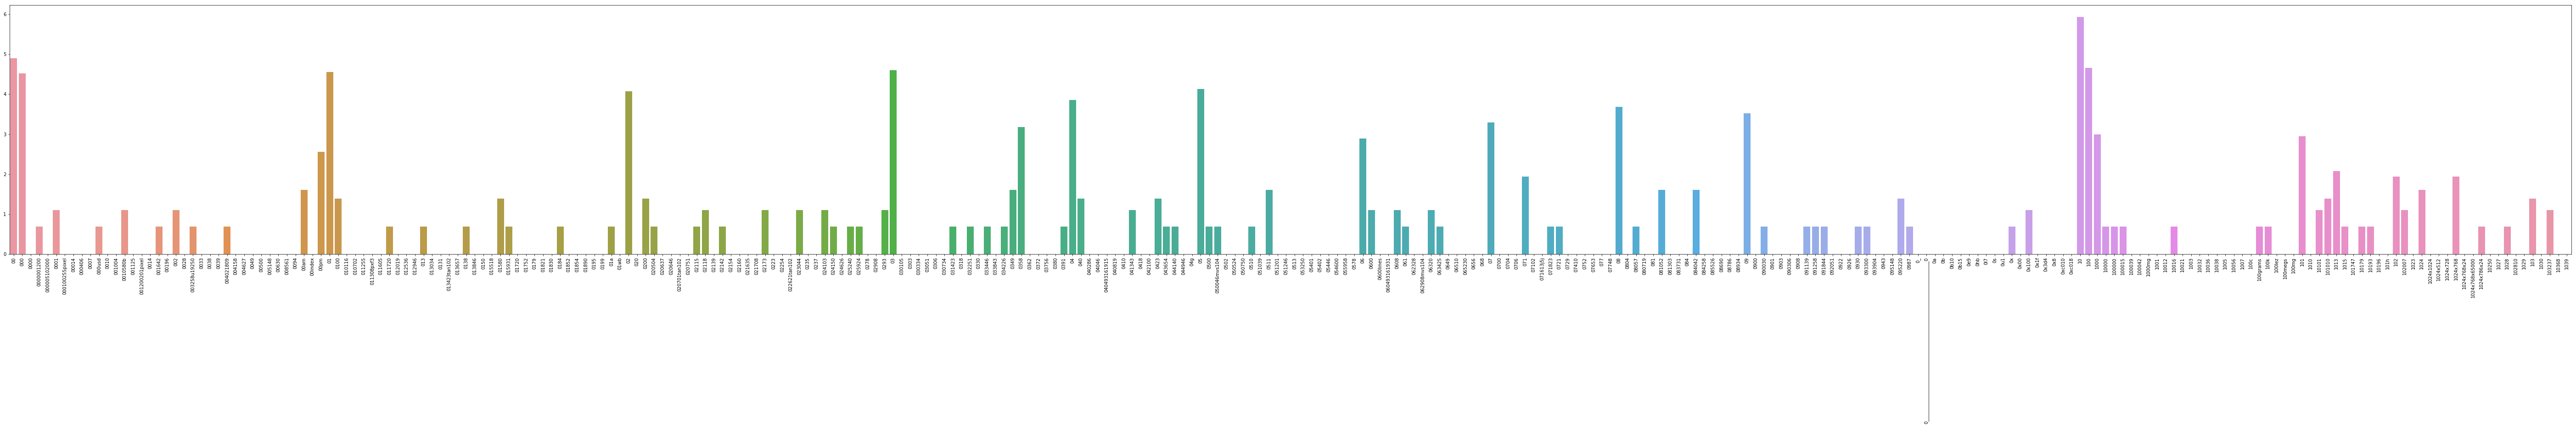

In [194]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [195]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [196]:
mlb = preprocessing.LabelBinarizer()

In [197]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [198]:
mlb.classes_

array([0, 1, 2, 3])

In [199]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [200]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [108]:
# Answer here


---

## 6. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as as Pandas and Scikit-learn. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## 7. References

- Pandas cook book ([Recommended for starters](http://pandas.pydata.org/pandas-docs/stable/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)